In [1]:
from Pipeline import BLEPipeline, WifiPipeline

# General data processing
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

# ML libraries
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, roc_auc_score

# System libraries
from itertools import izip, combinations
import random, time

# Warning filtering
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
plt.rcParams.update({'figure.max_open_warning': 0})

# Create dataset

In [2]:
time_start = time.time()

In [3]:
w = WifiPipeline()

In [4]:
# Uncomment when new traffic is collected. Keep commented otherwise to prevent overwriting current csv files
# w.extract_packet_features(create_master=True)

In [5]:
df = w.make_dataframe()

# Take out packets from router
df = df[df["DeviceType"]!="router"]

Router     101880
Mini        75782
Dropcam     45912
Kasa        17156
Netcam2      3056
Netcam3      2961
Netcam1      2314
Switch2      2204
Switch1      1963
Switch3      1955
Insight      1738
Switch4      1504
Lifx2         545
Lifx1         495
TpPlug        366
TpBulb        191
Name: Name, dtype: int64


## Data Exploration

In [51]:
palette = sns.color_palette("Set1", n_colors=8, desat=.5)
sns.set_palette(palette)
sns.set_style(style='white')

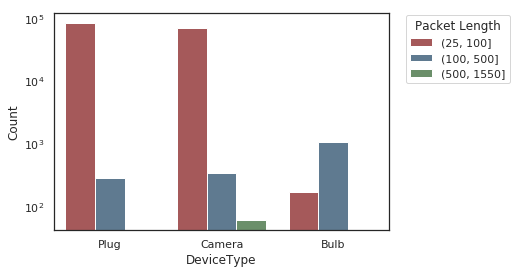

In [59]:
g = sns.countplot(x=df['DeviceType'].str.capitalize(), hue=pd.cut(df['PacketLength'], bins=[25,100,500,1550]));
g.set_yscale('log')
plt.legend(title='Packet Length', bbox_to_anchor=(1.05, 0.99), loc=2, borderaxespad=0.);
plt.ylabel('Count')
plt.savefig('Results/Plots/wifi-packetlength.png', bbox_inches='tight')

Belkin     93477
Dropcam    45912
Tp-link    17713
Lifi        1040
Name: Vendor, dtype: int64


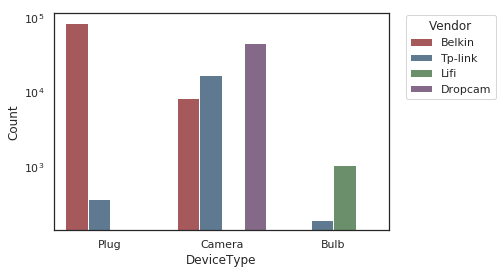

In [58]:
g = sns.countplot(x=df["DeviceType"].str.capitalize(), hue=df["Vendor"]);
g.set_yscale('log')
print df['Vendor'].value_counts()
plt.legend(title='Vendor', bbox_to_anchor=(1.05, 0.99), loc=2, borderaxespad=0.);
plt.ylabel('Count')
plt.savefig('Results/Plots/wifi-vendor.png', bbox_inches='tight')

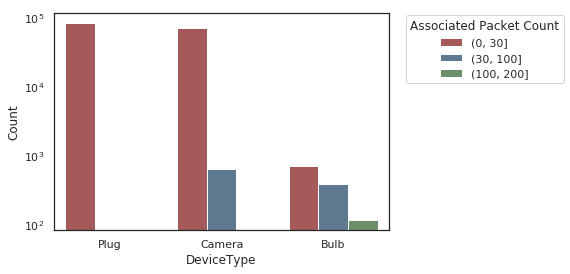

In [57]:
g = sns.countplot(x=df['DeviceType'].str.capitalize(), hue=pd.cut(df['Assoc_Packets'], bins=[0,30,100,200]));
g.set_yscale('log')
plt.legend(title='Associated Packet Count', bbox_to_anchor=(1.05, 0.99), loc=2, borderaxespad=0.);
plt.ylabel('Count')
plt.savefig('Results/Plots/wifi-assocpackets.png', bbox_inches='tight')

QoS_Null    132500
QoS_Data     20539
Data          5103
Name: Subtype, dtype: int64


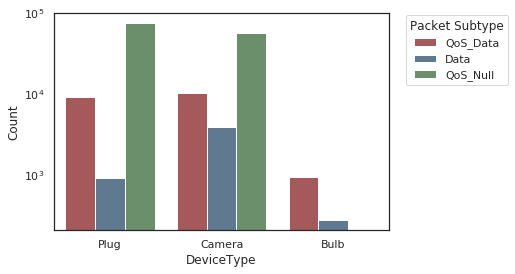

In [56]:
g = sns.countplot(x=df["DeviceType"].str.capitalize(), hue=df["Subtype"]);
g.set_yscale('log')
print df['Subtype'].value_counts()
plt.legend(title='Packet Subtype', bbox_to_anchor=(1.05, 0.99), loc=2, borderaxespad=0.);
plt.ylabel('Count')
plt.savefig('Results/Plots/wifi-subtype.png', bbox_inches='tight')